# Modelo de Regressão 1:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd


In [2]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips["pct_tip"] = (tips['tip'] / (tips['total_bill'] - tips['tip'])).round(2)

tips.head()

,total_bill,tip,sex,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.19
2,21.01,3.50,Male,No,Sun,Dinner,3,0.20
3,23.68,3.31,Male,No,Sun,Dinner,2,0.16
4,24.59,3.61,Female,No,Sun,Dinner,4,0.17


In [4]:
# Substituindo o nome da coluna.

tips.rename(columns={"sex":"gender"}, inplace=True)
tips.head()


,total_bill,tip,gender,smoker,day,time,size,pct_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.19
2,21.01,3.50,Male,No,Sun,Dinner,3,0.20
3,23.68,3.31,Male,No,Sun,Dinner,2,0.16
4,24.59,3.61,Female,No,Sun,Dinner,4,0.17


In [5]:
# Criando uma coluna que compreenderá os ganhos líquidos
# do restaurante, isto é, desconsiderando a gorjeta da receita.

tips["net_bill"] = tips["total_bill"] - tips["tip"]
tips.head()

,total_bill,tip,gender,smoker,day,time,size,pct_tip,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.19,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.20,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.16,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.17,20.98


**Realizando o gráfico do modelo de regressão linear:**

(0.0, 10.5)

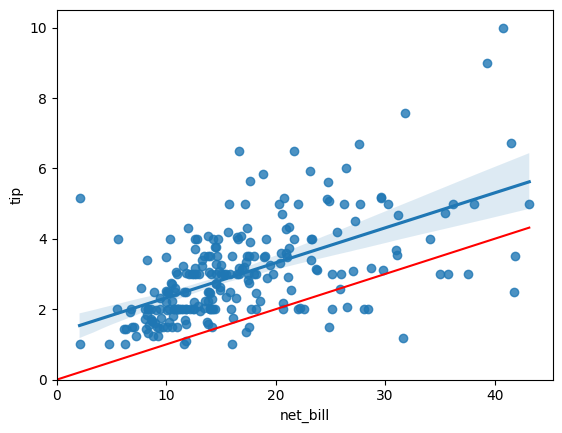

In [6]:
sns.regplot(y="tip", x="net_bill", data=tips)

# Gerando dados para as linhas das porcentagens que são pelo
# menos 10% do valor da compra:

# O código criado na variável x é a linha, que se constitui de
# um array, que começa do valor 0, indo até o máximo, que será
# o valor máximo da receita líquida. O valor de 100, como parâmetro,
# indica a quantidade máxima dos dados, igualmente espaçados no
# intervalo de 0 a 100.

x = np.linspace(0,tips["net_bill"].max(), 100)
y = 0.1*x

# Plotando a linha dos 10%:

plt.plot(x, y, "-r", label="linha dos 10%")

# Aprimorando aspectos da linha vermelha no gráfico,
# fazendo com que ela fique renta ao eixo y e x, uma
# vez que estou passando como parâmetro limite o valor
# de zero para os respectivos eixos.

plt.xlim(left=0)
plt.ylim(bottom=0)

**Criando o modelo de regressão:**

Criamos o modelo de regressão linear com base no pacote statsmodels. A variáveis que fica à esquerda do sinal **~** representa a variável resposta (y), enquanto que o termo à direita representa a variável explicativa (x). O modelo de regressão se completa a partir da função fit(), que treina o modelo, capacitando-o a criar o modelo. Vejamos:

In [7]:
reg_model = smf.ols("tip ~ net_bill", data=tips).fit()

# Retornando o resumo do medelo com os parâmetros
# necessários para o analisarmos, como R² e assim
# por diante.

reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           5.02e-23
Time:                        21:15:00   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Predição de novos dados:**

In [8]:
# Para realizar o a predição de novos dados com o modelo de regressão
# linear, basta passá-lo junto com a função predict(), vejamos:

# Definindo um intervalo das 22 primeiras linhas do dataframe, como
# forma de emular a entrada de novos dados.

dados_novos = tips
dados_novos.head()

,total_bill,tip,gender,smoker,day,time,size,pct_tip,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.19,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.20,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.16,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.17,20.98


In [9]:
# Predição dos novos dados:

reg_model.predict(dados_novos).to_frame().round(2)

,0
0,2.92
1,2.19
2,3.07
3,3.35
4,3.41
...,...
239,3.63
240,3.83
241,3.38
242,2.93


Decompondo a variância:


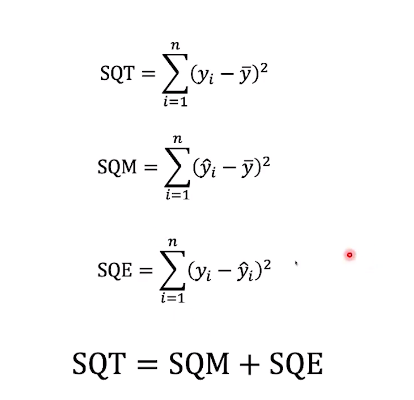

Compreende-se que quanto melhor for o modelo, menor será o SQE (soma de quadrados dos erros). Para facilitar essa compreensão há o R², que se refere ao coeficiente de determinação, o qual quanto mais próximo de 1 for, melhor será o modelo.

**Matematicamente, tem-se:**



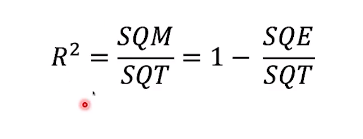

O coeficiente de correlação possui uma relação íntima com o R², de tal modo que a sua raiz resulta no coeficiente de relação, portanto: coef. de relação = (R²)¹/²

- **Análise dos resíduos:**



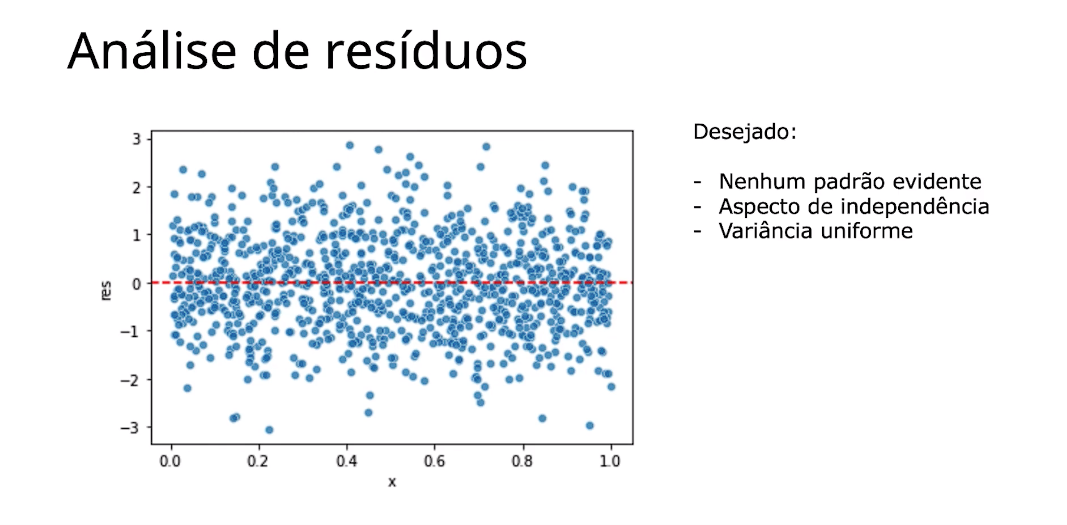

Essa é a "cara" que os resíduos, ou erros, ideias da nossa amostra, de tal modo que não se verifica um padrão evidente, dependência (ou seja, qualquer valor de x selecionado não é capaz de explicar o valor y encontrado), ou variância não uniforme, tanto que observa-se que os resíduos nesse gráfico variam uniformemente dos picos -3 e 3.

Gráficos de resíduos não ideais:


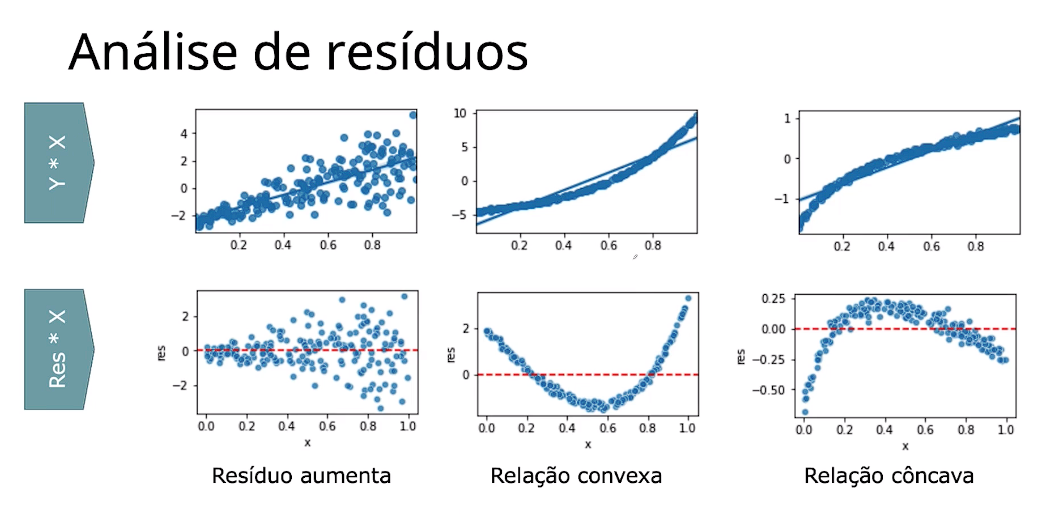

A partir desses gráficos, nota-se que se faz necessário reduzir os resíduos, para que forme um gráfico semelhante ao de cima. Para tanto, podemos transformar a função matemática responsável pelo modelo de regressão.

Transformando em x:

Uma forma de buscar um melhor ajuste em uma regressão com padrão de relação não linear entre x e y é buscar uma função g(x) que linearize essa relação. Dentre as opções, podemos tentar:
- categorizar x
- ajustar um polinômio
- transformar por uma função log, exponencial, raiz etc.

<Axes: xlabel='x', ylabel='y'>

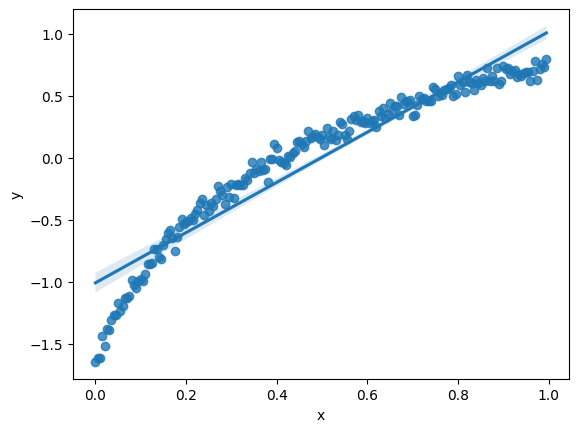

In [10]:
df = pd.DataFrame({'y':np.random.randn(200), 'x':np.arange(0,1,.005)})

df['y'] = np.log((df['x']-(df['x'].min()-.1))) + np.random.randn(200)*.05
df['y'] = df['y'] - df['y'].mean()
sns.regplot(x = 'x', y = 'y', data = df)

In [11]:
# Realizando para esse conjunto de dados, que resulta nesse gráfico,
# uma regressão convencional:

reg = smf.ols("y ~ x", data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     1993.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):          2.62e-105
Time:                        21:15:00   Log-Likelihood:                 54.185
No. Observations:                 200   AIC:                            -104.4
Df Residuals:                     198   BIC:                            -97.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0091      0.026    -38.614      0.000      -1.061      -0.958
x              2.0283      0.045     44.644      0.000       1.939       2.118
==============================================================================
Omnibus:                       32.805   Durbin-Watson:                   0.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.700
Skew:                          -1.035   Prob(JB):                     3.24e-10
Kurtosis:                       3.980   Cond. No.                         4.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

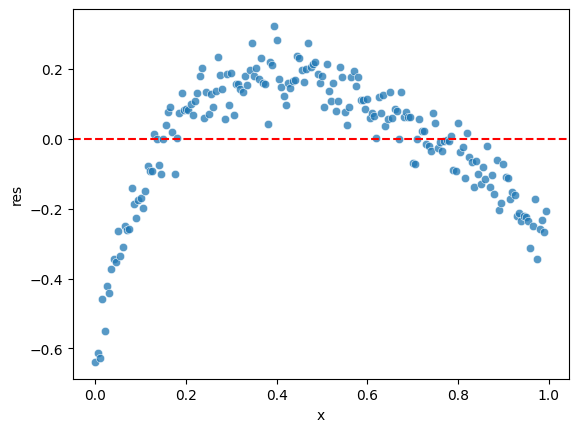

In [12]:
# Verificando graficamente o gráfico após a execução do modelo
# de regressão, observando os resíduos:

df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5657.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):          9.71e-175
Time:                        21:15:01   Log-Likelihood:                 220.58
No. Observations:                 200   AIC:                            -435.2
Df Residuals:                     197   BIC:                            -425.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.3751      0.017    -80.

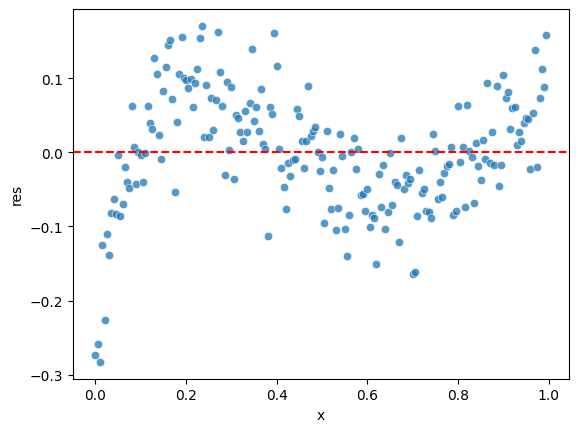

In [13]:
# Verificando o gráfico acima, nota-se que ele parece um gráfico
# logarítimo/ uma parábola. Desse modo, uma boa forma de ajustarmos
# a métrica da função matemática para a criação do modelo de regressão
# seria adotar um polinômio de segundo grau. Vejamos:

reg = smf.ols('y ~ x + np.power(x,2)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

Note que tanto o gráfico melhorou como também as métricas do R² e do erro padrão, aumentando o primeiro e reduzindo o segundo.

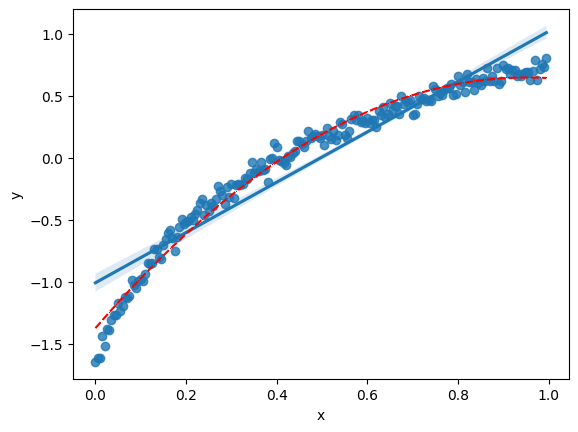

In [14]:
# Verifcando o gráfico de regressão a partir do novo modelo:

sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

Note que ele melhorou em relação ao primeiro, porém, perceba que ele não está muito bem ajustado à curva dos dados, como demonstra o gráfico dos erros.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     985.5
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           8.27e-79
Time:                        21:15:02   Log-Likelihood:                -7.4035
No. Observations:                 200   AIC:                             18.81
Df Residuals:                     198   BIC:                             25.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9566      0.065    -30.181      0.0

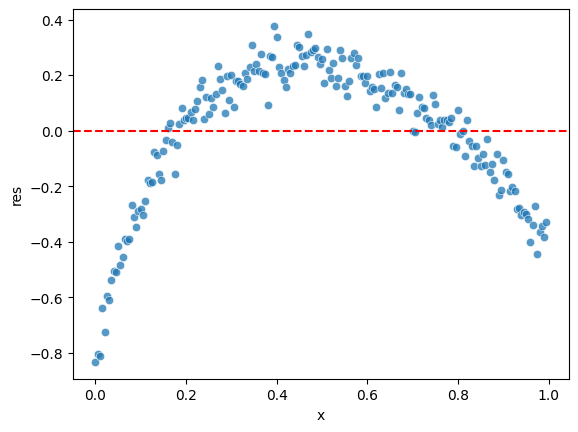

In [15]:
# Melhorando ainda mais o modelo:

reg = smf.ols('y ~ np.exp(x)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

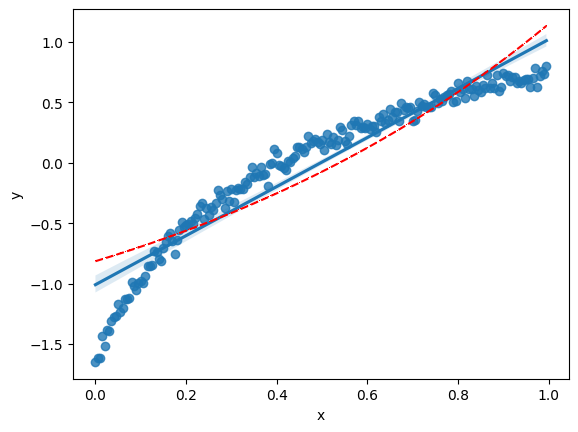

In [16]:
# Verifcando o gráfico de regressão a partir do novo modelo:

sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 3.051e+04
Date:                Wed, 03 Jan 2024   Prob (F-statistic):          7.79e-219
Time:                        21:15:03   Log-Likelihood:                 318.19
No. Observations:                 200   AIC:                            -632.4
Df Residuals:                     198   BIC:                            -625.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6724      0.005    129.

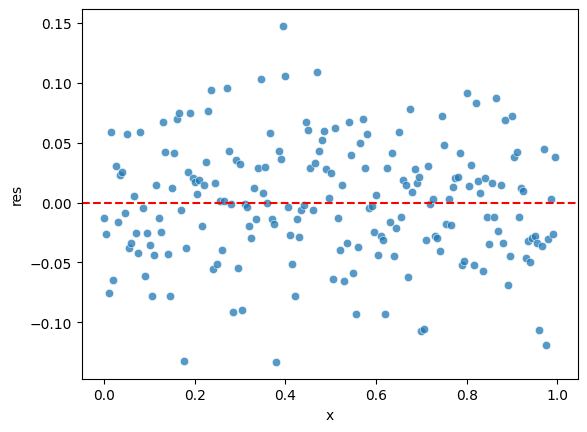

In [17]:
# Ajustando a um novo modelo, agora com uma função logarítima:

reg = smf.ols('y ~ np.log(x+.1)', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

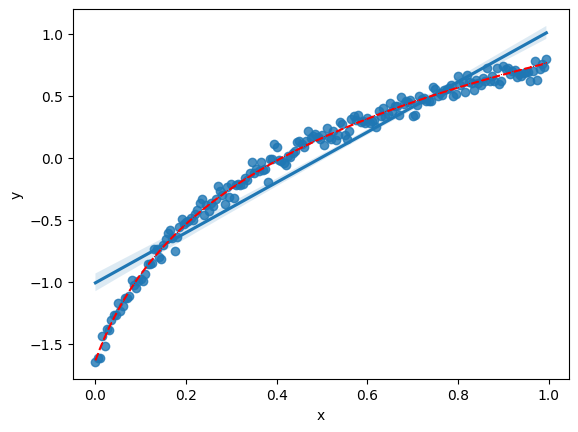

In [18]:
# Verifcando o gráfico de regressão a partir do novo modelo:

sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

Note que, como eu havia comentado anteriormente, o gráfico aparentava possuir uma dinâmica logarítima, uma vez que ele parecia o inverso de uma exponencial. Desse modo, ao ajustarmos o modelo segundo uma função logarítimica, conseguimos realizar um modelo que fique melhor adaptado aos dados, explicitado a partir do R² e do baixo erro padrão. Da mesma forma, verifica-se, pois, que as variáveis explicativas possuíam uma dinâmica, por assim dizer, de logaritimo e, por isso, que o modelo criado com base nesse aspecto matemático possui melhor ajuste.

**Transformando a variável resposta (y):**

<Axes: xlabel='x', ylabel='y'>

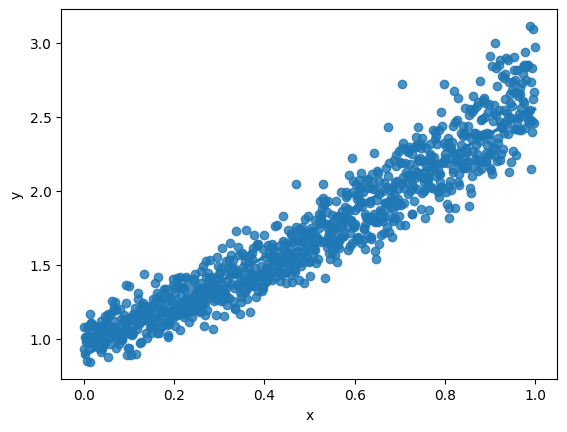

In [19]:
# Criando um dataframe aleatório:

x = np.arange(0,1,.001)
df = pd.DataFrame({'y':np.exp(x + np.random.randn(1000)*.08), 'x':x})

# Plotando o gráfico do dataframe:

sns.regplot(x = 'x', y = 'y', data = df)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     9498.
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:15:04   Log-Likelihood:                 435.18
No. Observations:                1000   AIC:                            -866.4
Df Residuals:                     998   BIC:                            -856.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8816      0.010     88.999      0.0

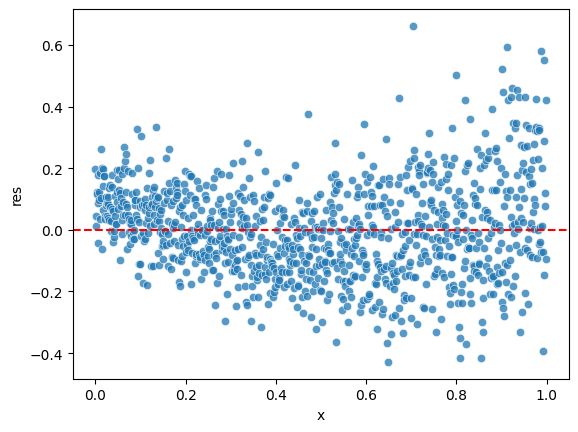

In [20]:
# Uma forma de ajustar melhor o modelo também se dá na transformação
# da variável resposta. Observando o gráfico de resíduos abaixo, nota-se
# que esse não está na sua forma ideal, aparentando, até mesmo, uma parabola.

reg = smf.ols('y ~ x', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

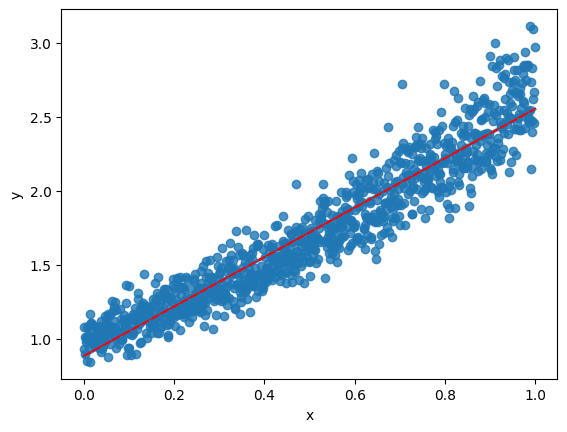

In [21]:
# Analisando o ajuste do R² com o gráfico do modelo:

sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], reg.fittedvalues, 'r,--')

In [22]:
# Outra forma de calcular o R^2
df['pred'] = reg.fittedvalues

r = df[['pred', 'y']].corr().iloc[0,1]**2
r

0.9049173811384157

In [23]:
df.head()

,y,x,res,pred
0,1.079431,0.000,0.197798,0.881633
1,0.928994,0.001,0.045687,0.883307
2,0.897635,0.002,0.012655,0.884980
3,1.010121,0.003,0.123468,0.886653
4,1.004888,0.004,0.116561,0.888327


                            OLS Regression Results                            
Dep. Variable:              np.log(y)   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 1.224e+04
Date:                Wed, 03 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:15:05   Log-Likelihood:                 1082.6
No. Observations:                1000   AIC:                            -2161.
Df Residuals:                     998   BIC:                            -2151.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.005      0.052      0.9

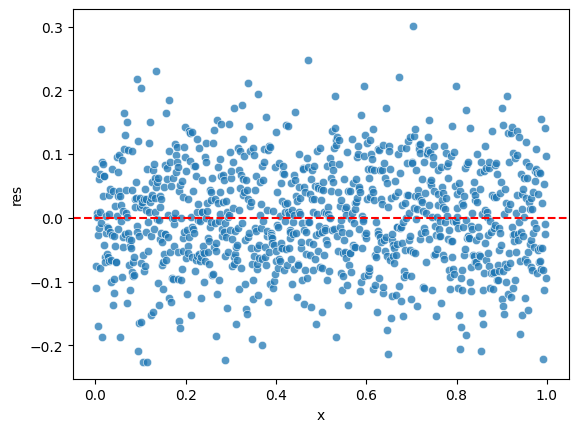

In [24]:
# Ajustando a variável resposta:

# Assumindo que a variável resposta possui um comportamento multiplicativo,
# tanto a partir do gráfico de resíduos quanto do modelo enquanto tal, uma forma
# de alterá-lo será o log de y. A transformação se dá por meio do log, pois
# o modelo de regressão opera de modo aditivo (soma), e para transformarmos um
# gráfico que possui dinâmica multiplicativa em soma, por assim dizer, ocorre
# através do log, pela propriedade.

reg = smf.ols('np.log(y) ~ x', data = df).fit()
print(reg.summary())
df['res'] = reg.resid

sns.scatterplot(x = 'x', y = 'res', data = df, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [25]:
df['pred_y'] = np.exp(reg.fittedvalues)

df[['pred_y', 'y']].corr().iloc[0,1]**2

0.9159551760045976

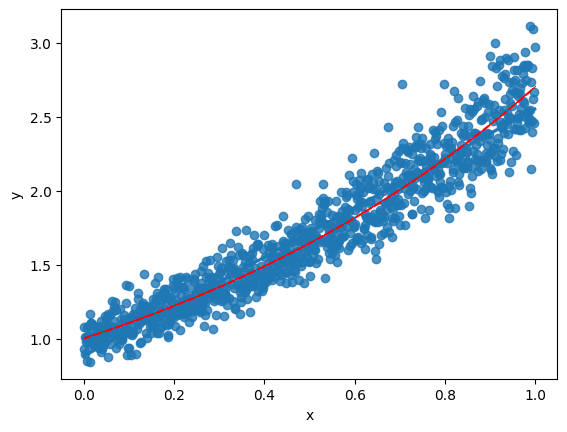

In [26]:
sns.regplot(x = 'x', y = 'y', data = df)
plt.plot(df['x'], df['pred_y'], 'r,--')

# Gráfico gerado a partir do novo modelo, que concebe a variável y
# transformada.

# Recursos com patsy:

In [27]:
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

O Patsy é um pacote que permite especificar uma matriz de modelagem de uma forma prática como no R, com a seguinte sintaxe:
```
'y ~ x1 + x2 + x3'
```

Ele possui diversos recursos como:
- inclui intercepto (ou exclui utilizando +0)
- inserir funções das variáveis de forma prática
- trabalhar com dados categorizados
- facilita a aplicação a novos dados

In [29]:
tips.head()

,total_bill,tip,gender,smoker,day,time,size,pct_tip,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.19,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.20,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.16,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.17,20.98


In [30]:
# Criando o design matrix com Patsy. Por meio dele, forma-se uma matriz com
# a qual torna-se possível realizar algumas operações, bem como de modo "natural"
# ele já transforma em dummies as colunas que armazenam dados categóricos, como
# no caso de gender e smoker.


# Nota-se ainda a presença do interceptor que ajuda, na prática, a garantir que
# o modelo ajustado leve em consideração o valor médio da variável dependente
# quando as variáveis independentes forem nulas.

y, X = patsy.dmatrices('pct_tip ~ gender + smoker + size + total_bill + 1', tips[:5])
X

DesignMatrix with shape (5, 5)
  Intercept  gender[T.Female]  smoker[T.No]  size  total_bill
          1                 1             1     2       16.99
          1                 0             1     3       10.34
          1                 0             1     3       21.01
          1                 0             1     2       23.68
          1                 1             1     4       24.59
  Terms:
    'Intercept' (column 0)
    'gender' (column 1)
    'smoker' (column 2)
    'size' (column 3)
    'total_bill' (column 4)

In [31]:
y

DesignMatrix with shape (5, 1)
  pct_tip
     0.06
     0.19
     0.20
     0.16
     0.17
  Terms:
    'pct_tip' (column 0)

In [32]:
# Caso queira tirar o intercept da design matrix, basta ao invés de colocar
# o número 1, como no código acima, colocar o número 0.

y, X = patsy.dmatrices('pct_tip ~ gender + smoker + size + total_bill + 0', tips[:5])
X

# Note que ao remover o intercept, ele cria uma outra coluna, para manter
# a proporção, referente ao gênero masculino, o qual antes estava subtendido
# quando o valor do dummy para gender[Female] era igual a zero.

DesignMatrix with shape (5, 5)
  gender[Male]  gender[Female]  smoker[T.No]  size  total_bill
             0               1             1     2       16.99
             1               0             1     3       10.34
             1               0             1     3       21.01
             1               0             1     2       23.68
             0               1             1     4       24.59
  Terms:
    'gender' (columns 0:2)
    'smoker' (column 2)
    'size' (column 3)
    'total_bill' (column 4)

**Transformando dados com Patsy:**

Aplicando funções

Podemos aplicar funções vetorizadas no Patsy de forma transparente, dentro do string. Em especial, a maioria das funções do Numpy são vetorizadas e podem ser usadas normalmente, como o ```np.log()``` e ```np.exp()``` que fazem logaritmo e função exponencial ($e^x$) respectivamente.

In [34]:
y, X = patsy.dmatrices('pct_tip ~ np.log(size) + standardize(total_bill) + center(tip)', tips[:5])
X

# standardize refere-se à padronização dos dados - transformando numa função normal
# sendo esse valor encontrado, abaixo da coluna, o desvio padrão, o quanto ele dista
# da média, que é concebida como zero.

# center refere-se ao quanto a gorjeta dista da média, enquanto que np.log é o
# logarítimo do tamanho das mesas.

DesignMatrix with shape (5, 4)
  Intercept  np.log(size)  standardize(total_bill)  center(tip)
          1       0.69315                 -0.44762       -1.608
          1       1.09861                 -1.72407       -0.958
          1       1.09861                  0.32401        0.882
          1       0.69315                  0.83651        0.692
          1       1.38629                  1.01118        0.992
  Terms:
    'Intercept' (column 0)
    'np.log(size)' (column 1)
    'standardize(total_bill)' (column 2)
    'center(tip)' (column 3)

#### Somando variáveis dentro do Patsy

Como o caractere ```+``` é interpretado dentro do contexto da construção da matriz de modelagem, se quisermos somar variáveis no Patsy podemos usar a função ```I()``` como abaixo.


In [35]:
y, X = patsy.dmatrices('tip ~ I(size + total_bill) + size + total_bill', tips[:5])
X

DesignMatrix with shape (5, 4)
  Intercept  I(size + total_bill)  size  total_bill
          1                 18.99     2       16.99
          1                 13.34     3       10.34
          1                 24.01     3       21.01
          1                 25.68     2       23.68
          1                 28.59     4       24.59
  Terms:
    'Intercept' (column 0)
    'I(size + total_bill)' (column 1)
    'size' (column 2)
    'total_bill' (column 3)

#### Dados categorizados no Patsy

Já vimos que o Patsy calcula as variáveis dummy para variáveis tipo **str**. Mas se quisermos tratar uma variável numérica como categorizada temos que usar a função ```C()```.


In [37]:
y, X = patsy.dmatrices('tip ~ gender  + C(size) + total_bill', tips[:5])
X

# Aqui eu estou categorizando a coluna size, que se refere ao tamanho das mesas,
# de tal modo que formo dummies, que me informam o tamanho das mesas. Por exemplo,
# se C(size)[T.3] e C(size)[T.4] significa que o tamanho da mesa é 2.

DesignMatrix with shape (5, 5)
  Intercept  gender[T.Female]  C(size)[T.3]  C(size)[T.4]  total_bill
          1                 1             0             0       16.99
          1                 0             1             0       10.34
          1                 0             1             0       21.01
          1                 0             0             0       23.68
          1                 1             0             1       24.59
  Terms:
    'Intercept' (column 0)
    'gender' (column 1)
    'C(size)' (columns 2:4)
    'total_bill' (column 4)

#### Definindo interações com Patsy
Podemos inserir interações no Patsy da mesma forma que em boa parte dos softwares estatísticos programáveis com a sintaxe ```var1*var2```.


In [39]:
y, X = patsy.dmatrices('tip ~ gender  + time + gender*time', tips[:5])
X

DesignMatrix with shape (5, 4)
  Columns:
    ['Intercept',
     'gender[T.Female]',
     'time[T.Dinner]',
     'gender[T.Female]:time[T.Dinner]']
  Terms:
    'Intercept' (column 0)
    'gender' (column 1)
    'time' (column 2)
    'gender:time' (column 3)
  (to view full data, use np.asarray(this_obj))

# Usando a api do Statsmodels:

In [40]:
modelo = sm.OLS(y,X).fit()

modelo.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                 -0.260
Method:                 Least Squares   F-statistic:                    0.1748
Date:                Wed, 03 Jan 2024   Prob (F-statistic):              0.704
Time:                        21:59:46   Log-Likelihood:                -7.3001
No. Observations:                   5   AIC:                             18.60
Df Residuals:                       3   BIC:                             17.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           1.4117      0.388      3.635      0.036       0.176       2.647
gender[T.Female]                   -0.2567      0.614     -0.418      0.704      -2.211       1.697
time[T.Dinner]                      1.4117      0.388      3.635      0.036       0.176       2.647
gender[T.Female]:time[T.Dinner]    -0.2567      0.614     -0.418      0.704      -2.211       1.697
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.756
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.619
Skew:                          -0.203   Prob(JB):                        0.734
Kurtosis:                       1.325   Cond. No.                     5.27e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.33e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Usando api do Statsmodels fórmula:

In [43]:
results = smf.ols("pct_tip ~ gender + size + np.log(total_bill)", tips).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pct_tip   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     7.898
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           4.79e-05
Time:                        22:01:41   Log-Likelihood:                 108.09
No. Observations:                 244   AIC:                            -208.2
Df Residuals:                     240   BIC:                            -194.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5393      0.071      7.613      0.000       0.400       0.679
gender[T.Female]      -0.0115      0.021     -0.543      0.588      -0.053       0.030
size                   0.0174      0.013      1.327      0.186      -0.008       0.043
np.log(total_bill)    -0.1307      0.029     -4.571      0.000      -0.187      -0.074
==============================================================================
Omnibus:                      460.524   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           213804.151
Skew:                          10.725   Prob(JB):                         0.00
Kurtosis:                     146.422   Cond. No.                         31.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Regressão múltipla:**

In [46]:
# Criando um novo modelo de regressão com variáveis explicativas múltiplas,
# que visam explicar a variável resposta gorjeta, que aqui, em especifico,
# refere-se ao log dela - transformando a variável resposta.

reg = smf.ols('np.log(tip) ~ day + gender + C(size) + np.log(net_bill) + smoker', data = tips).fit()

# Armazenando o resíduo do log das gorjetas numa nova coluna.
tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     12.30
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           3.50e-18
Time:                        22:55:21   Log-Likelihood:                -87.200
No. Observations:                 244   AIC:                             198.4
Df Residuals:                     232   BIC:                             240.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3071      0.218     -1.409      0.160      -0.737       0.122
day[T.Fri]           0.0477      0.097      0.491      0.624      -0.143       0.239
day[T.Sat]          -0.0206      0.062     -0.330      0.742      -0.143       0.102
day[T.Sun]           0.0638      0.064      0.992      0.322      -0.063       0.191
gender[T.Female]     0.0118      0.049      0.239      0.811      -0.085       0.109
C(size)[T.2]         0.2113      0.189      1.116      0.265      -0.162       0.584
C(size)[T.3]         0.3377      0.204      1.659      0.099      -0.063       0.739
C(size)[T.4]         0.4442      0.211      2.109      0.036       0.029       0.859
C(size)[T.5]         0.3890      0.259      1.499      0.135      -0.122       0.900
C(size)[T.6]         0.6753      0.276      2.444      0.015       0.131       1.220
smoker[T.No]        -0.0294      0.050     -0.585      0.559      -0.128       0.070
np.log(net_bill)     0.3811      0.061      6.274      0.000       0.261       0.501
==============================================================================
Omnibus:                        5.075   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                6.788
Skew:                           0.085   Prob(JB):                       0.0336
Kurtosis:                       3.799   Cond. No.                         65.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Verifique a tabela acima; note que nela há o R², bem como o desvio padrão para cada variável, mas existe algo fundamental: o valor-p, que se refere ao nível de cofiança estatística referente a um teste de hipótese. Nesse sentido, lembrando das aulas do Shine, todo e qualquer valor-p, por consenso, que for maior que 5% possui uma relevância estatística baixa, podendo ser rejeitado.

Desse modo, olhando para a tabela acima podemos ver o valor-p em ```P>|t|``` para cada uma das variáveis, de tal modo que umas possuem valor maior que 5%, que poderão ser desconsideradas para a realização do modelo, outras menores.  

Analisando a tabela, verifica-se que as variáveis que não possuem relevância estatística são: day, smoker e gender.

In [48]:
# Criando um novo modelo somente com as variáveis que apresentaram
# relevância estatística:

reg = smf.ols('np.log(tip) ~ C(size) + np.log(net_bill)', data = tips).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     22.31
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           8.67e-21
Time:                        22:57:34   Log-Likelihood:                -88.627
No. Observations:                 244   AIC:                             191.3
Df Residuals:                     237   BIC:                             215.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3111      0.202     -1.543      0.124      -0.708       0.086
C(size)[T.2]         0.2169      0.187      1.161      0.247      -0.151       0.585
C(size)[T.3]         0.3430      0.200      1.712      0.088      -0.052       0.738
C(size)[T.4]         0.4559      0.206      2.210      0.028       0.049       0.862
C(size)[T.5]         0.4122      0.255      1.618      0.107      -0.090       0.914
C(size)[T.6]         0.6721      0.270      2.493      0.013       0.141       1.203
np.log(net_bill)     0.3810      0.059      6.420      0.000       0.264       0.498
==============================================================================
Omnibus:                        6.180   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                8.912
Skew:                           0.108   Prob(JB):                       0.0116
Kurtosis:                       3.911   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note que na nova tabela acima o valor-p das mesmas variáveis mudou, isso porque elas dependem do contexto, por assim dizer, que são criados. Aqui verifica-se que as mesas maior ou igual a 4 possuem relevância estatística apenas, enquanto que na tabela anterior a essa todas as mesas possuíam relevância estatística.

**Analisando os resíduos:**

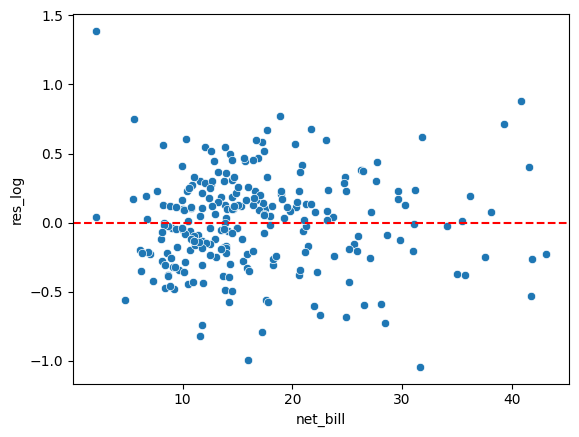

In [49]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

# Até parece estar "ok".

**Analisando os valores preditos:**

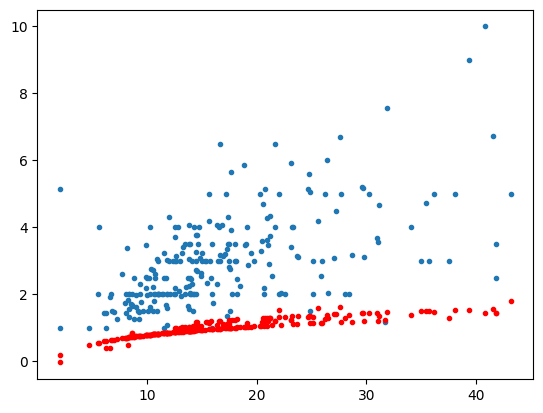

In [51]:
tips['pred_log'] = reg.fittedvalues

plt.plot(tips['net_bill'], tips['tip'], '.')
plt.plot(tips['net_bill'], tips['pred_log'], 'r.')